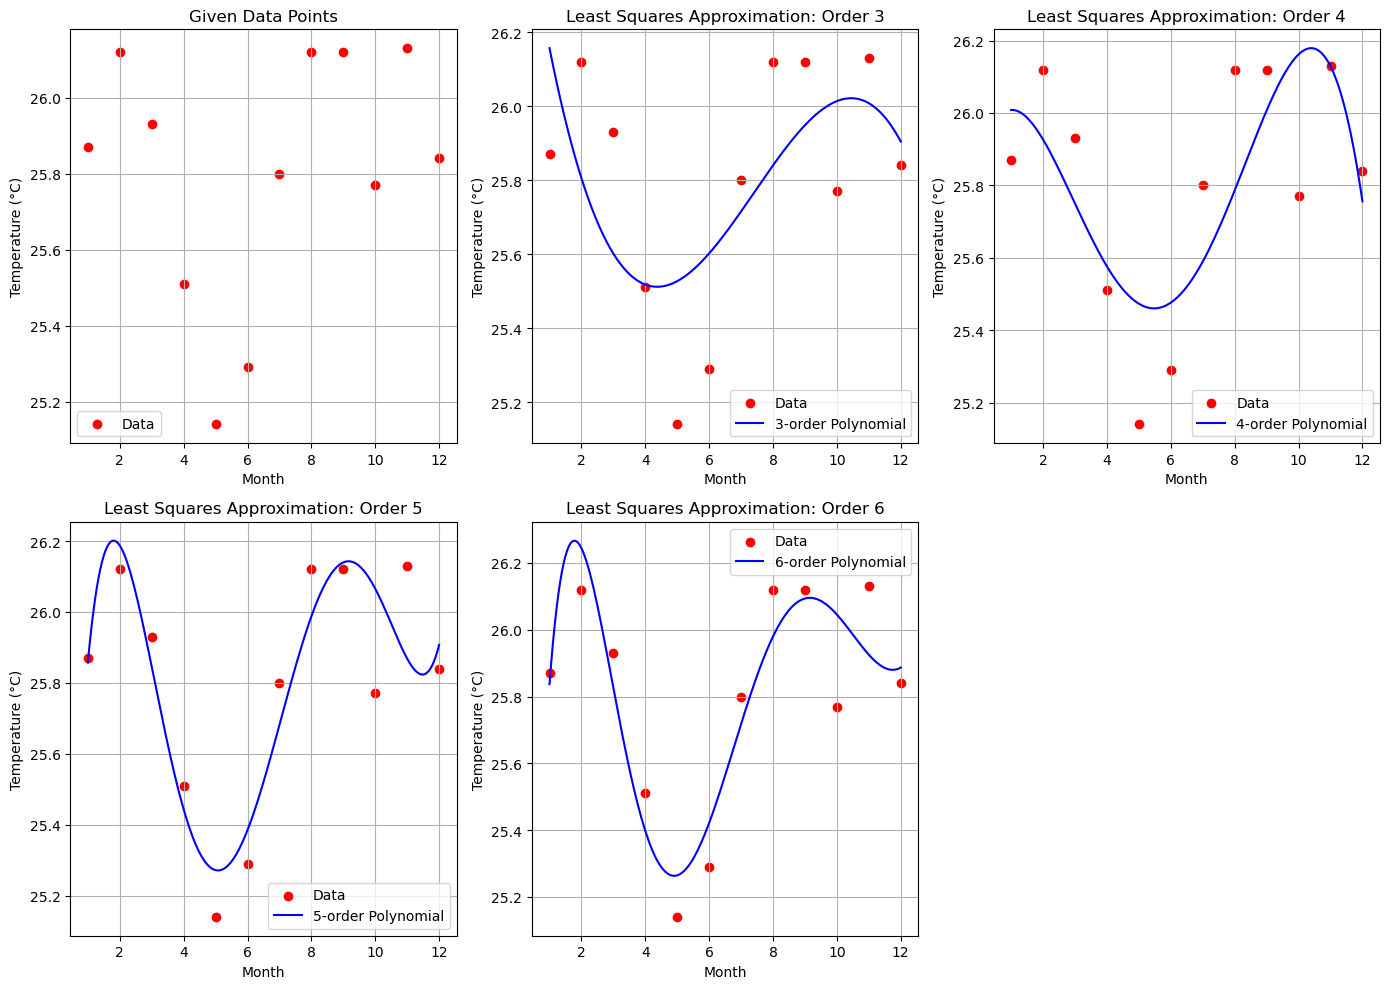

Analytical expression for the 3-order polynomial:
           3         2
-0.004545 x + 0.101 x - 0.6226 x + 26.68


Analytical expression for the 4-order polynomial:
          4           3          2
-0.00131 x + 0.02952 x - 0.1919 x + 0.3068 x + 25.87


Analytical expression for the 5-order polynomial:
           5           4          3         2
0.0006864 x - 0.02362 x + 0.2934 x - 1.567 x + 3.312 x + 23.84


Analytical expression for the 6-order polynomial:
            6            5           4          3         2
-5.617e-05 x + 0.002877 x - 0.05665 x + 0.5353 x - 2.451 x + 4.776 x + 23.03




In [4]:
# Complete code for the least squares approximation of the temperature data using polynomials of orders 3 to 6.

import numpy as np
import matplotlib.pyplot as plt

# Provided temperature data for each month in 2006 in Peru
months = np.arange(1, 13)
temperatures = np.array([25.87, 26.12, 25.93, 25.51, 25.14, 25.29, 25.8, 26.12, 26.12, 25.77, 26.13, 25.84])

# a) Plot the selected nodes
plt.figure(figsize=(14, 10))
plt.subplot(2, 3, 1)
plt.scatter(months, temperatures, color='red', label='Data')
plt.title('Given Data Points')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()

# b) Perform least square approximation using different orders of polynomials
orders = [3, 4, 5, 6]
approximation_functions = []
xx = np.linspace(np.min(months), np.max(months), 200)

# Perform the approximation for each order and plot
for index, order in enumerate(orders):
    # Setup the matrix for the Least Squares method
    B = np.vander(months, order + 1, increasing=True)
    # Solve the normal equations to find the least squares coefficients
    coeffs = np.linalg.lstsq(B, temperatures, rcond=None)[0]
    approximation_functions.append(np.poly1d(coeffs[::-1]))

    # Plot the approximation curve
    BB = np.vander(xx, order + 1, increasing=True)
    yy = BB @ coeffs
    plt.subplot(2, 3, index + 2)
    plt.scatter(months, temperatures, color='red', label='Data')
    plt.plot(xx, yy, 'b-', label=f'{order}-order Polynomial')
    plt.title(f'Least Squares Approximation: Order {order}')
    plt.xlabel('Month')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.legend()

# Display all plots
plt.tight_layout()
plt.show()

# c) Provide analytical expressions of the approximation functions
# Print the analytical expressions of the approximation functions
for order, poly in zip(orders, approximation_functions):
    print(f"Analytical expression for the {order}-order polynomial:")
    print(poly)
    print("\n")
